In [2]:
#Shooting stats for teams

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/passing/Premier-League-Stats"

driver.get(url)

columns = ['Squad', 'Pl', '90s', 'Total Cmp', 'Total Att', 'Total Cmp%', 'Total TotDist', 'Total PrgDist', 'Short Cmp', 'Short Att', 'Short Cmp%', 'Med Cmp', 'Med Att', 'Med Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    try:
        team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_passing_for"]/tbody/tr['+str(num)+']')
        team_dat = str(team_dat.text)
        team_name = re.findall(all_team_space, team_dat)[0]
        team_dat = re.sub(team_name, '', team_dat)
        list_team_dat = team_dat.split(' ')
        full_list_team_dat = [team_name.strip()] + list_team_dat
        array.append(full_list_team_dat)
    except:
        break

pd.DataFrame(array, columns = columns).to_csv("Teams_pass_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_passing"]/div[3]/div[2]/a').click()
time.sleep(2)
array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_passing_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_pass_data_agaisnt_team.csv")

driver.quit()


[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.17/chromedriver] found in cache


,Squad,Total Att,Cmp,Prog,Short Att,Med Att,Long Att
11,Manchester City,5871,87.2,7.522470,39.839891,41.815704,15.568046
10,Liverpool,5594,84.2,9.278132,36.235252,42.116553,18.662853
5,Chelsea,5076,84.9,7.147830,39.952719,41.036249,15.524035
12,Manchester Utd,5014,84.0,8.614143,40.227363,39.489430,16.453929
3,Brighton,4979,82.1,6.971624,34.525005,42.920265,18.638281
8,Leeds United,4636,81.6,8.780746,34.641933,42.299396,19.715272
6,Crystal Palace,4615,81.8,6.838060,37.226436,41.538462,17.789816
9,Leicester City,4510,81.3,7.939973,35.720621,42.394678,18.070953
18,West Ham,4339,80.1,9.260857,34.639318,41.230698,20.488592
16,Tottenham,4306,82.0,7.278391,39.758477,39.479796,17.278216


,Squad,Total Att,Cmp,Prog,Short Att,Med Att,Long Att
13,Newcastle Utd,3262,76.0,7.102502,35.438381,36.725935,24.371551
4,Burnley,3317,68.6,9.134827,34.549292,31.956587,29.122701
7,Everton,3358,73.3,10.475030,33.799881,37.373437,22.543180
2,Brentford,3436,71.1,9.001637,33.789290,38.125728,23.137369
17,Watford,3439,75.5,8.894879,29.514394,41.669090,24.890957
1,Aston Villa,3552,75.3,10.433807,30.292793,40.399775,25.788288
14,Norwich City,3800,78.9,6.966667,34.289474,39.105263,22.710526
15,Southampton,3874,76.5,8.768971,39.003614,40.113578,17.294786
0,Arsenal,4092,81.7,7.538139,39.149560,39.320626,17.741935
19,Wolves,4143,81.1,8.278737,32.874728,41.877866,21.940623



Counter attacking long ball teams (bottom table teams)


,Squad,Total Att,Cmp,Prog,Short Att,Med Att,Long Att
1,Aston Villa,3552,75.3,10.433807,30.292793,40.399775,25.788288
4,Burnley,3317,68.6,9.134827,34.549292,31.956587,29.122701
2,Brentford,3436,71.1,9.001637,33.789290,38.125728,23.137369
17,Watford,3439,75.5,8.894879,29.514394,41.669090,24.890957
13,Newcastle Utd,3262,76.0,7.102502,35.438381,36.725935,24.371551
14,Norwich City,3800,78.9,6.966667,34.289474,39.105263,22.710526


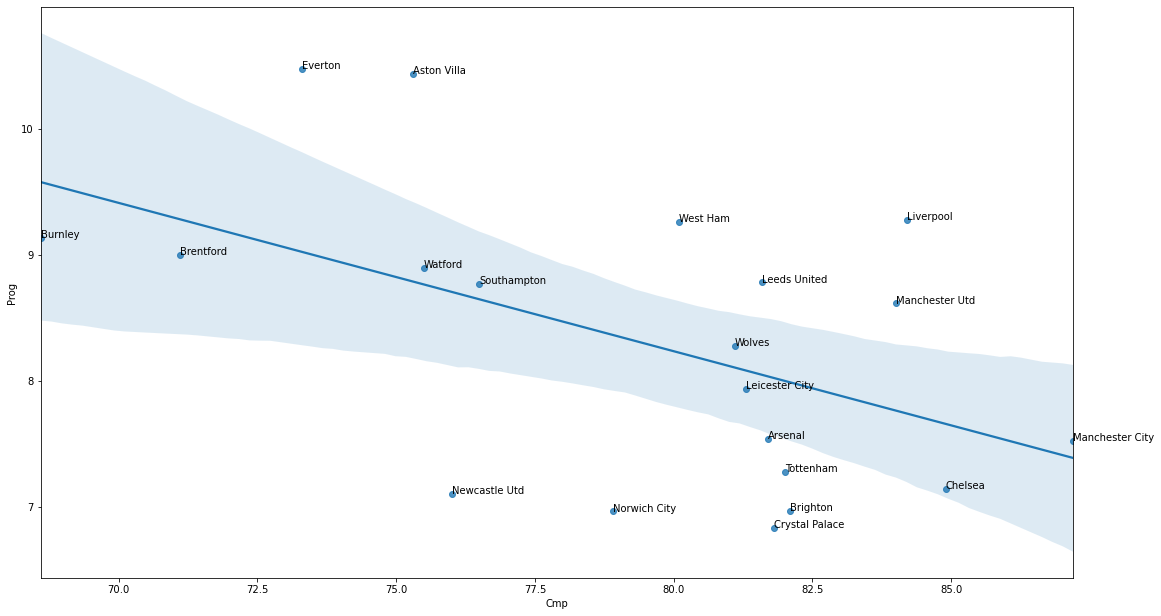

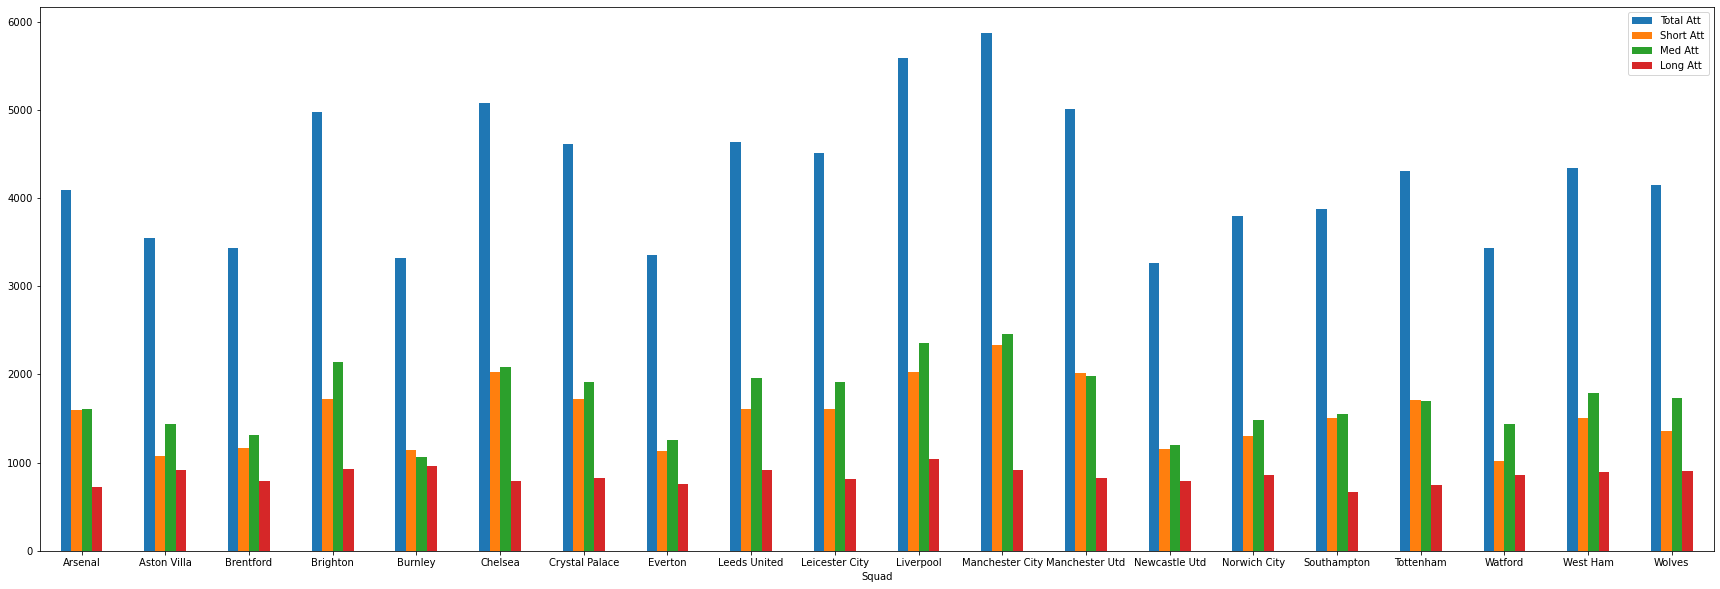

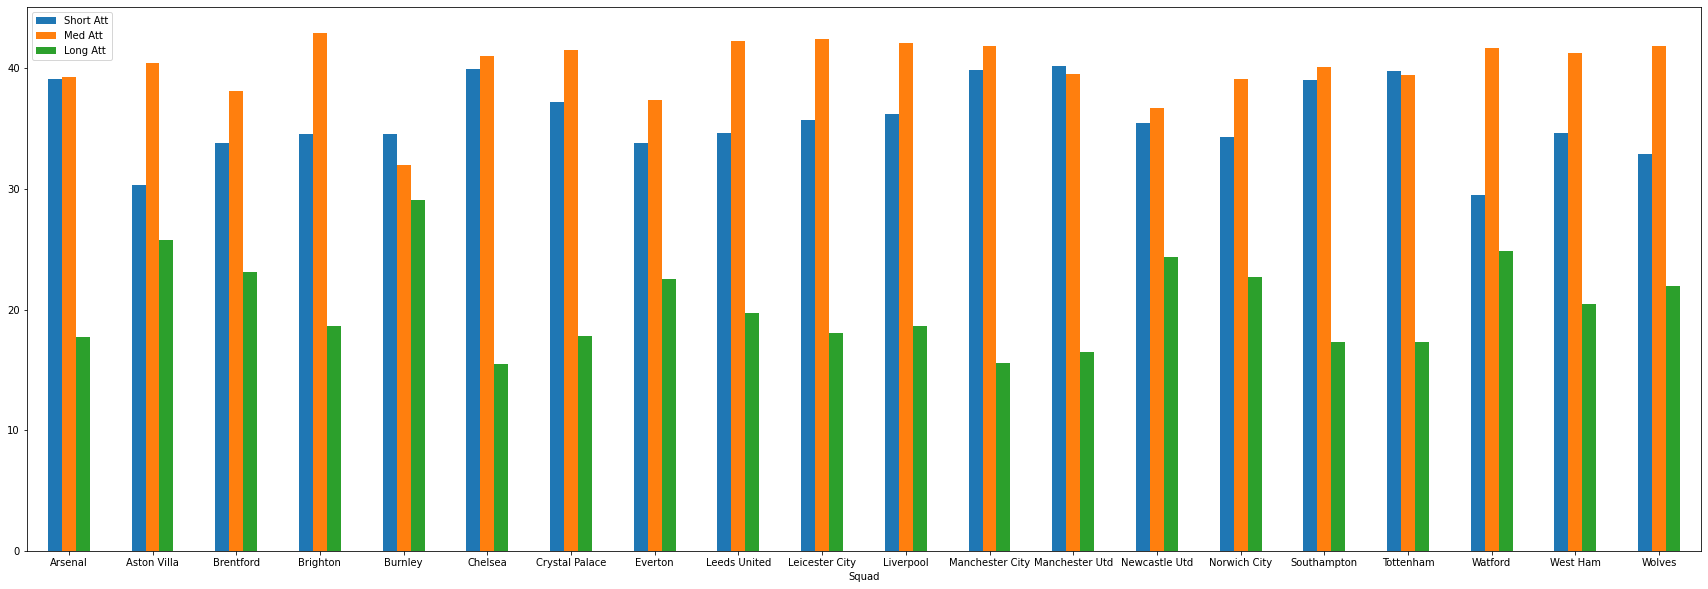

In [50]:
# Variety of attempted passes for each team
# Short 5-15 yards
# Med 15-30 yards
# Long 30+ yards

import pandas as pd
import seaborn as sns

df = pd.read_csv("Teams_pass_data.csv")
df2 = pd.read_csv("Opponent_pass_data_agaisnt_team.csv")

array = []
for team in list(df["Squad"]):
    total_attempted_passes = df[df["Squad"] == team]["Total Att"].values[0]
    completed_passes = df[df["Squad"] == team]["Total Cmp%"].values[0]
    per_prog_passes = (df[df["Squad"] == team]["Prog"].values[0]/df[df["Squad"] == team]["Total Cmp"].values[0])*100
    per_short_attempted_passes = (df[df["Squad"] == team]["Short Att"].values[0]/total_attempted_passes)*100
    per_med_attempted_passes = (df[df["Squad"] == team]["Med Att"].values[0]/total_attempted_passes)*100
    per_long_attempted_passes = (df[df["Squad"] == team]["Long Att"].values[0]/total_attempted_passes)*100
    array.append([team, total_attempted_passes, completed_passes, per_prog_passes, per_short_attempted_passes, per_med_attempted_passes, per_long_attempted_passes])

return_df = pd.DataFrame(array, columns = ["Squad", "Total Att", "Cmp", "Prog", "Short Att", "Med Att", "Long Att"])
display(return_df.sort_values(by = ["Total Att", "Short Att"], ascending = [False, False]).head(10))
print('')
display(return_df.sort_values(by = ["Total Att", "Long Att"], ascending = [True, False]).head(10))
print('')
weak_to_press_10 = return_df.sort_values(by = ["Cmp", "Long Att"], ascending = [True, False]).head(10)

#Negative footballing clubs
print('Counter attacking long ball teams (bottom table teams)')
baseline_longballs = return_df[return_df["Squad"] == "Norwich City"]["Long Att"].values[0]
display(return_df[return_df["Long Att"] >= baseline_longballs].sort_values(by = ["Prog"], ascending = [False]))
print('')

#Passing maps
#scatter1 = return_df[["Cmp", "Prog", "Squad"]].plot.scatter(x = "Cmp", y = "Prog")
scatter1 = sns.regplot(x = return_df["Cmp"], y = return_df["Prog"])
scatter1.figure.set_size_inches(18.5, 10.5)
for i, txt in enumerate(return_df.Squad):
    scatter1.annotate(txt, (return_df.Cmp.iat[i],return_df.Prog.iat[i]))
    
diverse_df = df[["Squad", "Total Att", "Short Att", "Med Att", "Long Att"]].set_index("Squad")
barplot1 = diverse_df.plot.bar(rot=0, figsize=(30, 10))

diverse_df_per = return_df[["Short Att", "Med Att", "Long Att", "Squad"]].set_index("Squad")
barplot2 = diverse_df_per.plot.bar(rot = 0, figsize = (30, 10))



